# Assignment 2
Basic Aerodynamics  
s134166 Aleksander Andersen  
s000000 Martin Simon

In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### (1)
Employ the fundamental equation of Prandtl’s lifting-line theory to determine the distribution of induced angle of attack along the wing for different aspect ratios, AR, and angles of attack, AOA. Plot the distributions for AR = 4, 6, 8, 10 and AOA = 0°, 5°, 10°. Compute the corresponding induced drag and lift coefficients.

The fundamental equation of Prandtl's lifting line theory is
$$ \alpha(y_0) = \dfrac{\Gamma(y_0)}{\pi V_{\infty}c(y_0)}
+ \alpha_{L=0}(y_0) + \dfrac{1}{4\pi V_{\infty}} \int_{-b/2}^{b/2} \dfrac{(d\Gamma/dy)dy}{y_0-y}$$  
where  
$y$: lifting line axis  
$b$: wing span ( $ \pm b/2$)  

$\text{AR} =b^2/S$  
$S$: area (for rectangular plate)

$S=cb \Rightarrow \text{AR}=b/c$

Eq. 8.44a rewritten with $A_R= b/c$  
$ \sum_{n=1}^\infty A_n \sin{n\theta}
\left( \dfrac{4 \, A_R(\theta)}{m_0(\theta)} + \dfrac{n}{\sin{\theta}}
\right) = \alpha (\theta) - \alpha_{L0}(\theta)$  
Corresponds to matrix equation  
$Ax=b$

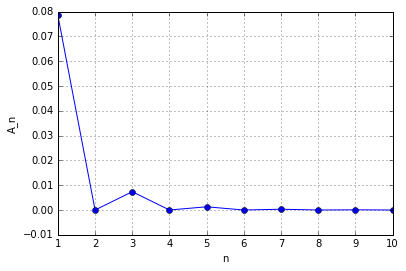

In [99]:
m0 = 0.11*180/np.pi
AR = 4
alpha = 10 *np.pi/180
alpha_L0 = -4 *np.pi/180

n_max = 10 # number of terms in sum
n = np.linspace(1,n_max,n_max).astype(int)

nEQ = n_max # number of equations (theta values)
nEQ2 = int(nEQ+2)
theta = np.linspace(np.pi/nEQ, np.pi-np.pi/nEQ, nEQ)
#theta= theta[1: nEQ2-1]

M = np.empty((nEQ, n_max)) # Empty matrix (100x100)
b = np.empty( nEQ )
for i in range(nEQ):
    for j in range(n_max):
        M[i,j] = np.sin(n[j]*theta[i]) *(4*AR/m0 + n[j]/np.sin(theta[i]))
    b[i] = alpha-alpha_L0

An = np.linalg.solve(M,b)
plt.plot(n,An,'-bo')
plt.grid()
plt.xlabel('n')
plt.ylabel('A_n')

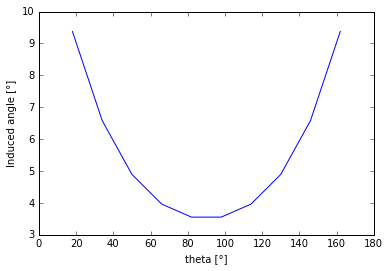

In [95]:
alpha_i = np.empty(nEQ)
for i in range(nEQ):
    alpha_i[i] = sum(n*An*np.sin(n*theta[i])/np.sin(theta[i]))
plt.plot(theta*180/np.pi,alpha_i*180/np.pi)
plt.xlabel('theta [°]')
plt.ylabel('Induced angle [°]')
plt.show()